### **`Business Understanding`**

**Objective**: Predict changes in the price index based on historical prices of Bitcoin, oil, and gold, along with other related features (e.g., DXY index).

**Key Questions:**
1. How are Bitcoin, oil, and gold prices related to changes in the price index?
2. Can external features like holidays, weekdays, or DXY influence the model's predictions?
3. What insights can the model provide for portfolio management or market forecasting?

### **`Data Understanding`**

### **Importattion of Packages**

In [1]:
# Descriptive Analytics Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Analysis Packages
from statsmodels.tsa.seasonal import seasonal_decompose

# Machine Learning Packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor , XGBClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import shap
from sklearn.inspection import PartialDependenceDisplay



# Data Manipulations & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preparation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.decomposition import PCA

# from imblearn.pipeline import Pipeline as imbpipeline
# from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

#Model Persistance
import joblib


#Utilities
import warnings
sns.set_style('darkgrid')
import os

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)

In [3]:
# Get the current directory of the script
current_dir = os.getcwd()

# Go back one folder and then to 'datasets'
csv_path = os.path.join(current_dir, "..", "datasets", "final_dataset.csv")

# Normalize the path for platform independence
csv_path = os.path.normpath(csv_path)

In [4]:
df = pd.read_csv(csv_path)
df.head()

,Unnamed: 0,Date,DoW,Month,Year,btc_open,btc_high,btc_low,btc_close,oil_close,oil_open,oil_high,oil_low,gold_close,gold_open,gold_high,gold_low,dxy_close,dxy_open,dxy_high,dxy_low,IS_HOLIDAY,IS_WEEKDAY,Title
0,3652,2024-10-31,Thursday,10,2024,NaN,NaN,NaN,NaN,69.26,69.10,70.81,68.30,"2,749.30","2,799.10","2,801.20","2,741.80",103.98,104.08,104.22,103.82,0.0,1,NaN
1,3651,2024-10-30,Wednesday,10,2024,NaN,NaN,NaN,NaN,68.61,67.47,69.17,67.28,"2,800.80","2,786.90","2,801.80","2,782.40",103.99,104.25,104.44,103.98,0.0,1,NaN
2,3650,2024-10-29,Tuesday,10,2024,NaN,NaN,NaN,NaN,67.21,68.02,68.52,66.72,"2,768.80","2,741.90","2,773.20","2,741.90",104.32,104.31,104.64,104.21,0.0,1,NaN
3,3649,2024-10-28,Monday,10,2024,NaN,NaN,NaN,NaN,67.38,68.98,69.00,66.92,"2,755.90","2,749.20","2,758.30","2,736.90",104.32,104.32,104.57,104.12,0.0,1,NaN
4,3648,2024-10-27,Sunday,10,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN


### **Exploratory Data Analysis**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3653 non-null   int64  
 1   Date        3653 non-null   object 
 2   DoW         3653 non-null   object 
 3   Month       3653 non-null   int64  
 4   Year        3653 non-null   int64  
 5   btc_open    3643 non-null   float64
 6   btc_high    3643 non-null   float64
 7   btc_low     3643 non-null   float64
 8   btc_close   3643 non-null   float64
 9   oil_close   2637 non-null   float64
 10  oil_open    2637 non-null   float64
 11  oil_high    2637 non-null   float64
 12  oil_low     2637 non-null   float64
 13  gold_close  2564 non-null   object 
 14  gold_open   2564 non-null   object 
 15  gold_high   2564 non-null   object 
 16  gold_low    2564 non-null   object 
 17  dxy_close   2610 non-null   float64
 18  dxy_open    2610 non-null   float64
 19  dxy_high    2610 non-null  

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3653.0,1826.000000,1054.674594,0.00,913.0000,1826.000,2739.0000,3652.00
Month,3653.0,6.522310,3.449345,1.00,4.0000,7.000,10.0000,12.00
Year,3653.0,2019.333425,2.897193,2014.00,2017.0000,2019.000,2022.0000,2024.00
btc_open,3643.0,18449.732976,20039.914540,176.90,1319.8550,9314.130,29848.5850,73079.38
btc_high,3643.0,18865.656794,20480.738577,211.73,1339.5950,9466.350,30391.1100,73750.07
btc_low,3643.0,18008.726780,19563.811246,171.51,1315.0650,9149.390,29307.6250,71334.09
btc_close,3643.0,18467.017137,20052.330675,178.10,1334.8400,9316.630,29859.7400,73083.50
oil_close,2637.0,61.870300,17.522667,11.57,48.7000,59.640,74.1300,119.78
oil_open,2637.0,61.894638,17.514253,18.01,48.7900,59.650,74.1800,120.66
oil_high,2637.0,62.903367,17.769240,19.66,49.4600,60.500,75.3100,126.42


#### **Data Cleaning**

In [7]:
df.drop(columns='Unnamed: 0', inplace=True)

In [8]:
df.isna().sum()

Date             0
DoW              0
Month            0
Year             0
btc_open        10
btc_high        10
btc_low         10
btc_close       10
oil_close     1016
oil_open      1016
oil_high      1016
oil_low       1016
gold_close    1089
gold_open     1089
gold_high     1089
gold_low      1089
dxy_close     1043
dxy_open      1043
dxy_high      1043
dxy_low       1043
IS_HOLIDAY       0
IS_WEEKDAY       0
Title         3549
dtype: int64

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df['Date'].min(), df['Date'].max()

(Timestamp('2014-11-01 00:00:00'), Timestamp('2024-10-31 00:00:00'))

In [11]:
numeric_columns = ['gold_open', 'gold_high', 'gold_low', 'gold_close'] 
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')


##### **Rearranging columns for easier analysis**

In [12]:
df.columns

Index(['Date', 'DoW', 'Month', 'Year', 'btc_open', 'btc_high', 'btc_low',
       'btc_close', 'oil_close', 'oil_open', 'oil_high', 'oil_low',
       'gold_close', 'gold_open', 'gold_high', 'gold_low', 'dxy_close',
       'dxy_open', 'dxy_high', 'dxy_low', 'IS_HOLIDAY', 'IS_WEEKDAY', 'Title'],
      dtype='object')

In [13]:
new_column_order = ['Date', 'DoW', 'Month', 'Year', 
                    'btc_open', 'btc_high', 'btc_low','btc_close',
                    'oil_open', 'oil_high', 'oil_low', 'oil_close', 
                    'gold_open', 'gold_high', 'gold_low', 'gold_close',
                    'dxy_open', 'dxy_high', 'dxy_low', 'dxy_close', 
                    'IS_HOLIDAY', 'IS_WEEKDAY', 'Title']

df = df[new_column_order]

In [14]:
df.rename(columns={'Title': 'Holiday_Name'}, inplace=True)

In [15]:
df.head()

,Date,DoW,Month,Year,btc_open,btc_high,btc_low,btc_close,oil_open,oil_high,oil_low,oil_close,gold_open,gold_high,gold_low,gold_close,dxy_open,dxy_high,dxy_low,dxy_close,IS_HOLIDAY,IS_WEEKDAY,Holiday_Name
0,2024-10-31,Thursday,10,2024,NaN,NaN,NaN,NaN,69.10,70.81,68.30,69.26,2799.1,2801.2,2741.8,2749.3,104.08,104.22,103.82,103.98,0.0,1,NaN
1,2024-10-30,Wednesday,10,2024,NaN,NaN,NaN,NaN,67.47,69.17,67.28,68.61,2786.9,2801.8,2782.4,2800.8,104.25,104.44,103.98,103.99,0.0,1,NaN
2,2024-10-29,Tuesday,10,2024,NaN,NaN,NaN,NaN,68.02,68.52,66.72,67.21,2741.9,2773.2,2741.9,2768.8,104.31,104.64,104.21,104.32,0.0,1,NaN
3,2024-10-28,Monday,10,2024,NaN,NaN,NaN,NaN,68.98,69.00,66.92,67.38,2749.2,2758.3,2736.9,2755.9,104.32,104.57,104.12,104.32,0.0,1,NaN
4,2024-10-27,Sunday,10,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN


#### **Distribution Analysis**

[]

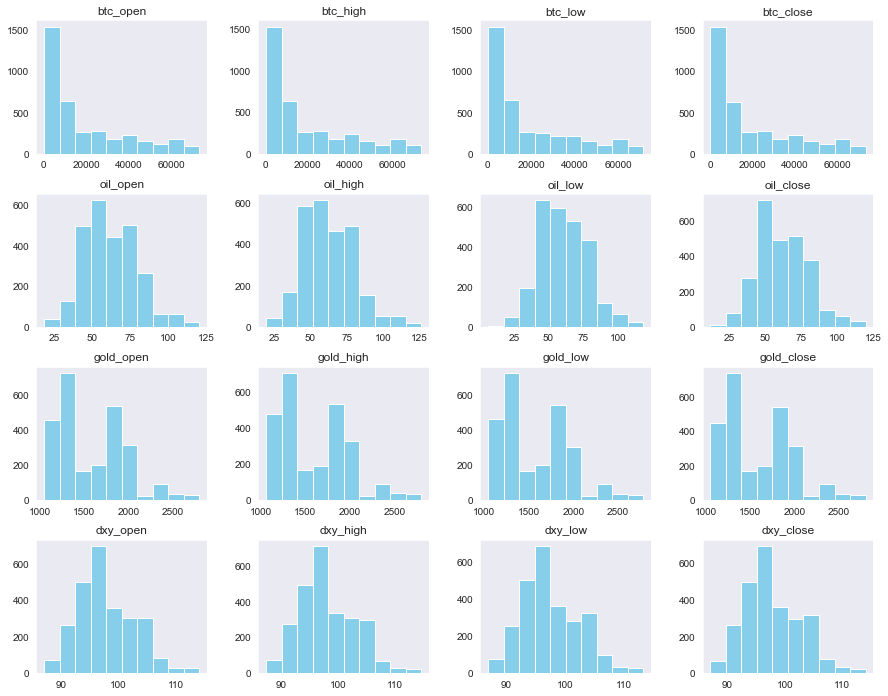

In [16]:
df.drop(columns=['Date', 'Month', 'Year', 'IS_HOLIDAY', 'IS_WEEKDAY']).hist(grid=False, color='skyblue', figsize=(15, 12) )
plt.plot()

#### **Correlation Analysis**

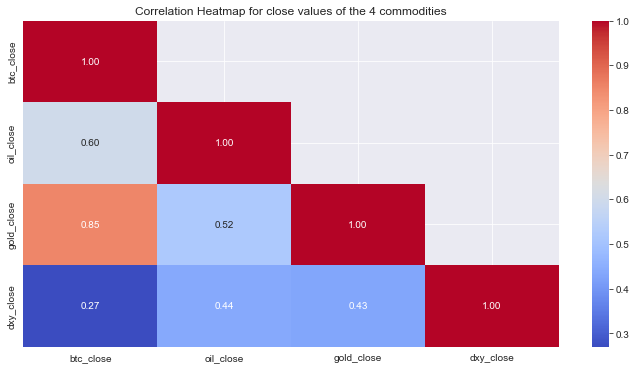

In [17]:
correlation_matrix = df[['btc_close', 'oil_close', 'gold_close', 'dxy_close']].corr().round(2)

# Modify the mask to exclude the diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Plot the heatmap with the modified mask to include the diagonal
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap for close values of the 4 commodities")
plt.show()

#### **Time Series Analysis**

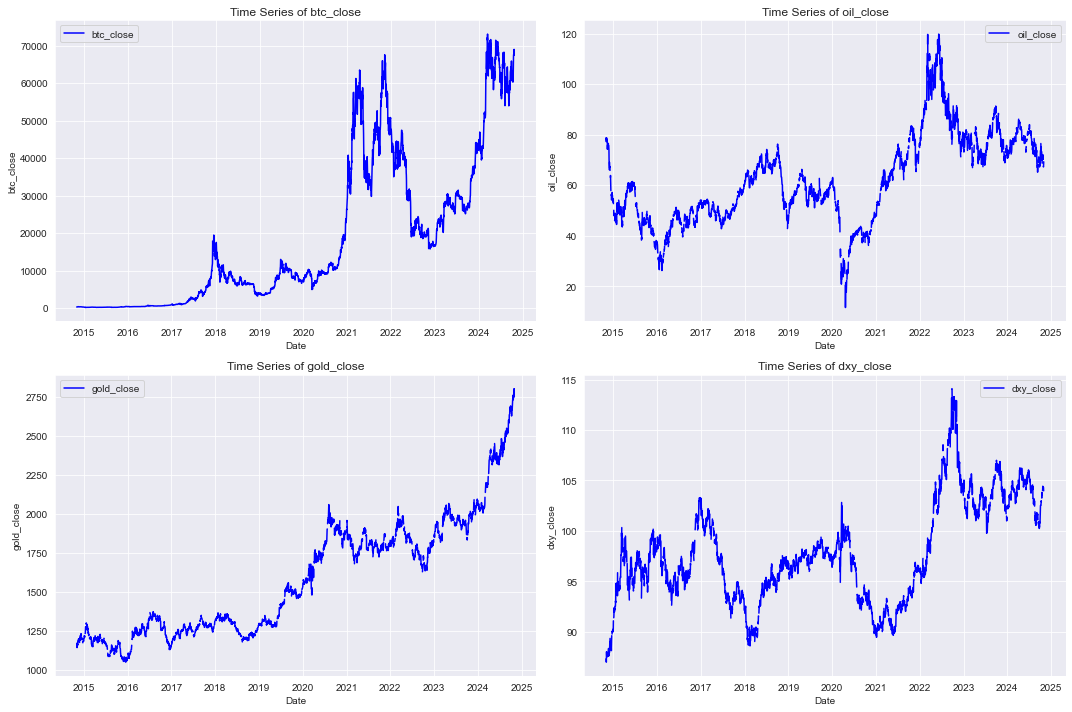

In [18]:
# Set Date as the index for time series analysis
df.set_index('Date', inplace=True)

# Ensure the dataset is sorted by date in ascending order
df = df.sort_index(ascending=True)


# List of variables to analyze
variables = ['btc_close', 'oil_close', 'gold_close', 'dxy_close']

# Plot time series of each variable
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    plt.plot(df[var], label=var, color='blue')
    plt.title(f"Time Series of {var}")
    plt.xlabel("Date")
    plt.ylabel(var)
    plt.legend()

plt.tight_layout()
plt.show()

#### **Addictive Decomposition**

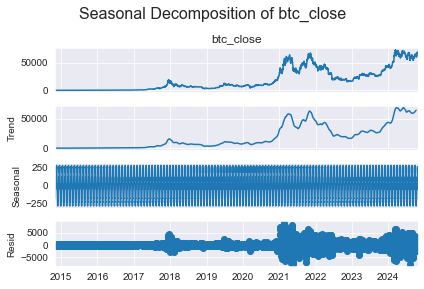

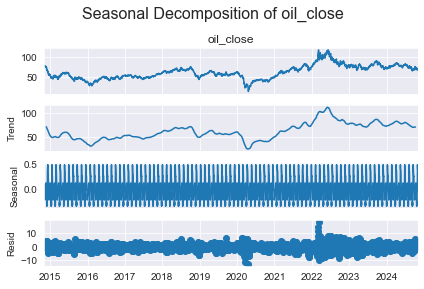

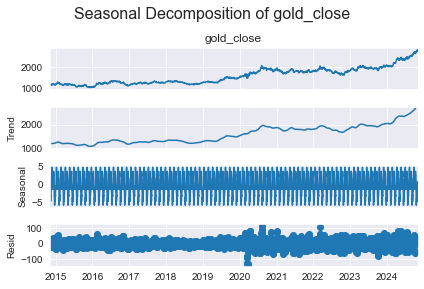

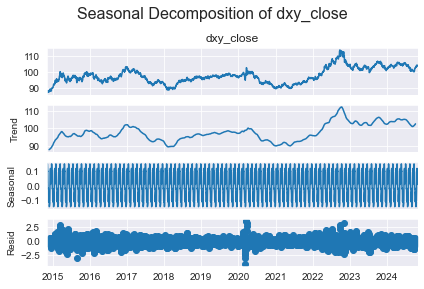

In [19]:
for variable in variables:
    decomposition = seasonal_decompose(df[variable].dropna(), model='additive', period=30)
    fig = decomposition.plot()
    fig.suptitle("") 
    plt.subplots_adjust(top=0.85) 
    plt.gcf().text(0.5, 0.95, f"Seasonal Decomposition of {variable}", fontsize=16, ha='center') 
    plt.show()

#### **Multiplicative Decomposition**

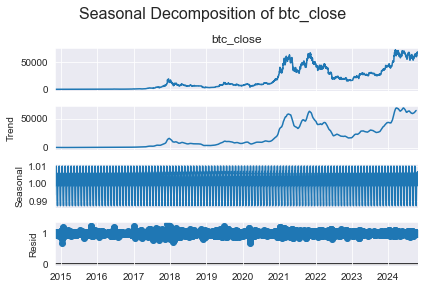

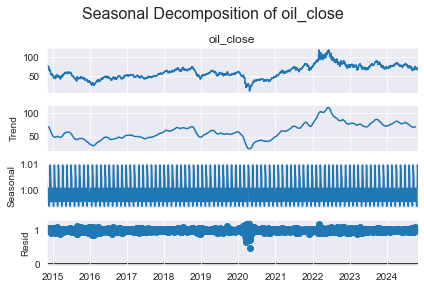

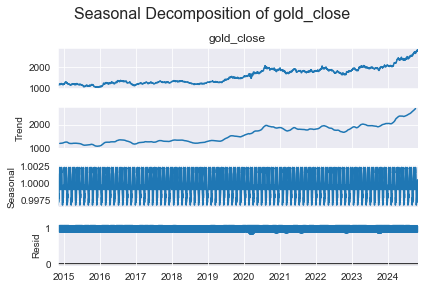

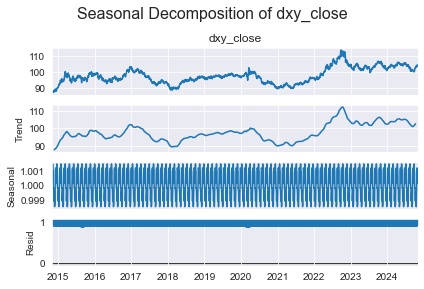

In [20]:
for variable in variables:
    decomposition = seasonal_decompose(df[variable].dropna(), model='multiplicative', period=30)
    fig = decomposition.plot()
    fig.suptitle("") 
    plt.subplots_adjust(top=0.85)  
    plt.gcf().text(0.5, 0.95, f"Seasonal Decomposition of {variable}", fontsize=16, ha='center')  
    plt.show()

### **Outlier Analysis**

Text(0.5, 1.0, 'Outlier Analysis for Oil and Dollar Index')

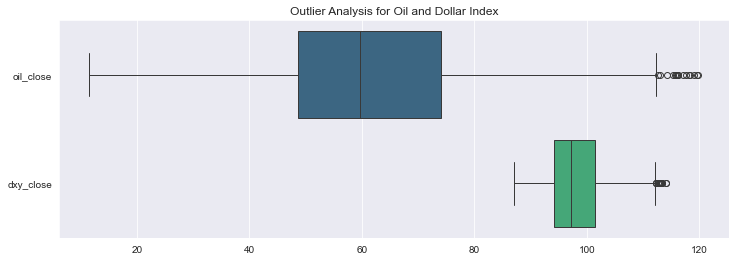

In [21]:
plt.figure(figsize=(12, 4))
sns.boxplot(df[['oil_close', 'dxy_close']], orient='h', palette='viridis')
plt.title('Outlier Analysis for Oil and Dollar Index')

[]

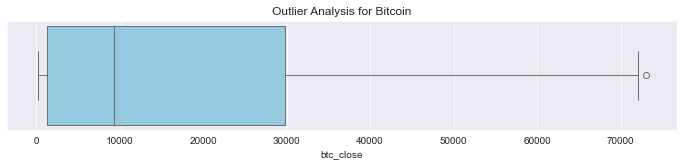

In [22]:
plt.figure(figsize=(12, 2))
sns.boxplot(df['btc_close'], orient='h', color='skyblue' )
plt.title('Outlier Analysis for Bitcoin')
plt.plot()

[]

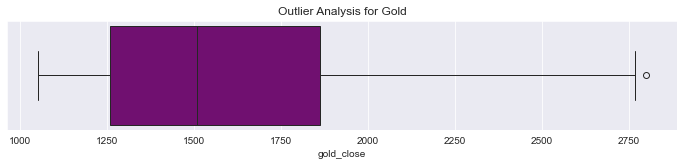

In [23]:
plt.figure(figsize=(12, 2))
sns.boxplot(df['gold_close'], orient='h', color='purple' )
plt.title('Outlier Analysis for Gold')
plt.plot()

### **`Data Preparation`**

Hamed's code here

##### **Imputation missing values using Linear Interpolation and Backward fill**

In [24]:
df.isna().sum()

DoW                0
Month              0
Year               0
btc_open          10
btc_high          10
btc_low           10
btc_close         10
oil_open        1016
oil_high        1016
oil_low         1016
oil_close       1016
gold_open       1089
gold_high       1089
gold_low        1089
gold_close      1089
dxy_open        1043
dxy_high        1043
dxy_low         1043
dxy_close       1043
IS_HOLIDAY         0
IS_WEEKDAY         0
Holiday_Name    3549
dtype: int64

In [25]:
# Imputing missing values in the oil, gold, and dollar data with interpolation
cols = ['btc_open', 'btc_high', 'btc_low', 'btc_close',
        'oil_open', 'oil_high', 'oil_low', 'oil_close',
         'gold_open', 'gold_high', 'gold_low', 'gold_close',
        'dxy_close', 'dxy_open', 'dxy_high', 'dxy_low']

df[cols] = df[cols].interpolate(method='linear', axis=0)

In [26]:
df.head()

,DoW,Month,Year,btc_open,btc_high,btc_low,btc_close,oil_open,oil_high,oil_low,oil_close,gold_open,gold_high,gold_low,gold_close,dxy_open,dxy_high,dxy_low,dxy_close,IS_HOLIDAY,IS_WEEKDAY,Holiday_Name
Date,,,,,,,,,,,,,,,,,,,,,,
2014-11-01,Saturday,11,2014,338.65,340.53,321.05,325.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN
2014-11-02,Sunday,11,2014,326.08,329.05,320.63,325.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN
2014-11-03,Monday,11,2014,325.57,334.00,325.48,327.55,80.59,80.98,78.08,78.78,1171.1,1173.4,1161.0,1169.8,87.08,87.41,87.02,87.31,0.0,1,NaN
2014-11-04,Tuesday,11,2014,327.16,331.77,325.08,330.49,78.22,78.41,75.84,77.19,1164.6,1175.0,1163.4,1167.7,87.25,87.30,86.88,86.98,0.0,1,NaN
2014-11-05,Wednesday,11,2014,330.68,343.37,330.68,339.49,77.36,79.35,76.46,78.68,1168.4,1169.3,1137.1,1145.7,87.01,87.61,86.94,87.44,0.0,1,NaN


In [27]:
df.isna().sum()

DoW                0
Month              0
Year               0
btc_open           0
btc_high           0
btc_low            0
btc_close          0
oil_open           2
oil_high           2
oil_low            2
oil_close          2
gold_open          2
gold_high          2
gold_low           2
gold_close         2
dxy_open           2
dxy_high           2
dxy_low            2
dxy_close          2
IS_HOLIDAY         0
IS_WEEKDAY         0
Holiday_Name    3549
dtype: int64

In [28]:
df.head()

,DoW,Month,Year,btc_open,btc_high,btc_low,btc_close,oil_open,oil_high,oil_low,oil_close,gold_open,gold_high,gold_low,gold_close,dxy_open,dxy_high,dxy_low,dxy_close,IS_HOLIDAY,IS_WEEKDAY,Holiday_Name
Date,,,,,,,,,,,,,,,,,,,,,,
2014-11-01,Saturday,11,2014,338.65,340.53,321.05,325.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN
2014-11-02,Sunday,11,2014,326.08,329.05,320.63,325.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN
2014-11-03,Monday,11,2014,325.57,334.00,325.48,327.55,80.59,80.98,78.08,78.78,1171.1,1173.4,1161.0,1169.8,87.08,87.41,87.02,87.31,0.0,1,NaN
2014-11-04,Tuesday,11,2014,327.16,331.77,325.08,330.49,78.22,78.41,75.84,77.19,1164.6,1175.0,1163.4,1167.7,87.25,87.30,86.88,86.98,0.0,1,NaN
2014-11-05,Wednesday,11,2014,330.68,343.37,330.68,339.49,77.36,79.35,76.46,78.68,1168.4,1169.3,1137.1,1145.7,87.01,87.61,86.94,87.44,0.0,1,NaN


#### **Feature Engineering**
1. **Creating weekly and monthly moving averages**
2. **Creating percentage change for all 4 commoditiies**

In [29]:
## Running Averages for open and close data

# List of price columns
price_cols = ['btc_open', 'btc_close', 'oil_open', 'oil_close', 'gold_open', 'gold_close', 'dxy_open', 'dxy_close']

# Calculate running weekly and monthly averages
for col in price_cols:
    df[f'{col}_weekly_avg'] = df[col].rolling(window=7, min_periods=1).mean()
    df[f'{col}_monthly_avg'] = df[col].rolling(window=30, min_periods=1).mean()

In [30]:
# Asset categories and their respective price types
assets = {
    'btc': ['btc_open', 'btc_close', 'btc_high', 'btc_low'],
    'oil': ['oil_open', 'oil_close', 'oil_high', 'oil_low'],
    'gold': ['gold_open', 'gold_close', 'gold_high', 'gold_low'],
    'dxy': ['dxy_open', 'dxy_close', 'dxy_high', 'dxy_low']
}

# Calculate daily percentage changes
for asset, cols in assets.items():
    open_col, close_col, high_col, low_col = cols
    df[f'{asset}_Daily_percentage'] = ((df[close_col] - df[open_col]) / df[open_col] * 100)
    df[f'{asset}_Daily_max_percentage'] = ((df[high_col] - df[open_col]) / df[open_col] * 100)
    df[f'{asset}_Daily_min_percentage'] = ((df[low_col] - df[open_col]) / df[open_col] * 100)

In [31]:
# Calculate intraday volatility as the percentage difference between high and low prices
assets = ['btc', 'oil', 'gold', 'dxy']  

for asset in assets:
    df[f'{asset}_intraday_volatility'] = ((df[f'{asset}_high'] - df[f'{asset}_low']) / df[f'{asset}_open']) * 100

In [32]:
# Calculate rolling volatility of daily percentage changes over 7-day and 30-day windows

for asset in assets:
    # Daily percentage change
    df[f'{asset}_daily_pct_change'] = df[f'{asset}_close'].pct_change() * 100
    
    # Rolling volatility (standard deviation of daily percentage changes)
    df[f'{asset}_rolling_volatility_7'] = df[f'{asset}_daily_pct_change'].rolling(window=7).std()
    df[f'{asset}_rolling_volatility_30'] = df[f'{asset}_daily_pct_change'].rolling(window=30).std()

In [33]:
df.isna().sum()

DoW                              0
Month                            0
Year                             0
btc_open                         0
btc_high                         0
btc_low                          0
btc_close                        0
oil_open                         2
oil_high                         2
oil_low                          2
oil_close                        2
gold_open                        2
gold_high                        2
gold_low                         2
gold_close                       2
dxy_open                         2
dxy_high                         2
dxy_low                          2
dxy_close                        2
IS_HOLIDAY                       0
IS_WEEKDAY                       0
Holiday_Name                  3549
btc_open_weekly_avg              0
btc_open_monthly_avg             0
btc_close_weekly_avg             0
btc_close_monthly_avg            0
oil_open_weekly_avg              2
oil_open_monthly_avg             2
oil_close_weekly_avg

#### **Shift Target for Forecasting**

In [34]:
df['dxy_future_pct_change'] = df['dxy_daily_pct_change'].shift(-1)

In [35]:
df.head()

,DoW,Month,Year,btc_open,btc_high,btc_low,btc_close,oil_open,oil_high,oil_low,oil_close,gold_open,gold_high,gold_low,gold_close,dxy_open,dxy_high,dxy_low,dxy_close,IS_HOLIDAY,IS_WEEKDAY,Holiday_Name,btc_open_weekly_avg,btc_open_monthly_avg,btc_close_weekly_avg,btc_close_monthly_avg,oil_open_weekly_avg,oil_open_monthly_avg,oil_close_weekly_avg,oil_close_monthly_avg,gold_open_weekly_avg,gold_open_monthly_avg,gold_close_weekly_avg,gold_close_monthly_avg,dxy_open_weekly_avg,dxy_open_monthly_avg,dxy_close_weekly_avg,dxy_close_monthly_avg,btc_Daily_percentage,btc_Daily_max_percentage,btc_Daily_min_percentage,oil_Daily_percentage,oil_Daily_max_percentage,oil_Daily_min_percentage,gold_Daily_percentage,gold_Daily_max_percentage,gold_Daily_min_percentage,dxy_Daily_percentage,dxy_Daily_max_percentage,dxy_Daily_min_percentage,btc_intraday_volatility,oil_intraday_volatility,gold_intraday_volatility,dxy_intraday_volatility,btc_daily_pct_change,btc_rolling_volatility_7,btc_rolling_volatility_30,oil_daily_pct_change,oil_rolling_volatility_7,oil_rolling_volatility_30,gold_daily_pct_change,gold_rolling_volatility_7,gold_rolling_volatility_30,dxy_daily_pct_change,dxy_rolling_volatility_7,dxy_rolling_volatility_30,dxy_future_pct_change
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-11-01,Saturday,11,2014,338.65,340.53,321.05,325.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,338.650,338.650,325.750000,325.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.809243,0.555145,-5.197106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.752252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-02,Sunday,11,2014,326.08,329.05,320.63,325.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,332.365,332.365,325.820000,325.820000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.058268,0.910819,-1.671369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.582188,NaN,NaN,NaN,0.042978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-03,Monday,11,2014,325.57,334.00,325.48,327.55,80.59,80.98,78.08,78.78,1171.1,1173.4,1161.0,1169.8,87.08,87.41,87.02,87.31,0.0,1,NaN,330.100,330.100,326.396667,326.396667,80.590000,80.590000,78.780000,78.780000,1171.100000,1171.100000,1169.800000,1169.800000,87.080000,87.080000,87.310000,87.310000,0.608164,2.589305,-0.027644,-2.245936,0.483931,-3.114530,-0.111007,0.196397,-0.862437,0.264125,0.378962,-0.068902,2.616949,3.598461,1.058834,0.447864,0.509374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.377964
2014-11-04,Tuesday,11,2014,327.16,331.77,325.08,330.49,78.22,78.41,75.84,77.19,1164.6,1175.0,1163.4,1167.7,87.25,87.30,86.88,86.98,0.0,1,NaN,329.365,329.365,327.420000,327.420000,79.405000,79.405000,77.985000,77.985000,1167.850000,1167.850000,1168.750000,1168.750000,87.165000,87.165000,87.145000,87.145000,1.017851,1.409096,-0.635775,-1.316799,0.242905,-3.042700,0.266186,0.893010,-0.103040,-0.309456,0.057307,-0.424069,2.044871,3.285605,0.996050,0.481375,0.897573,NaN,NaN,-2.018279,NaN,NaN,-0.179518,NaN,NaN,-0.377964,NaN,NaN,0.528857
2014-11-05,Wednesday,11,2014,330.68,343.37,330.68,339.49,77.36,79.35,76.46,78.68,1168.4,1169.3,1137.1,1145.7,87.01,87.61,86.94,87.44,0.0,1,NaN,329.628,329.628,329.834000,329.834000,78.723333,78.723333,78.216667,78.216667,1168.033333,1168.033333,1161.066667,1161.066667,87.113333,87.113333,87.243333,87.243333,2.664207,3.837547,0.000000,1.706308,2.572389,-1.163392,-1.942828,0.077028,-2.678877,0.494196,0.689576,-0.080451,3.837547,3.735781,2.755906,0.770026,2.723229,NaN,NaN,1.930302,NaN,NaN,-1.884046,NaN,NaN,0.528857,NaN,NaN,0.651876


In [36]:
df.isna().sum()

DoW                              0
Month                            0
Year                             0
btc_open                         0
btc_high                         0
btc_low                          0
btc_close                        0
oil_open                         2
oil_high                         2
oil_low                          2
oil_close                        2
gold_open                        2
gold_high                        2
gold_low                         2
gold_close                       2
dxy_open                         2
dxy_high                         2
dxy_low                          2
dxy_close                        2
IS_HOLIDAY                       0
IS_WEEKDAY                       0
Holiday_Name                  3549
btc_open_weekly_avg              0
btc_open_monthly_avg             0
btc_close_weekly_avg             0
btc_close_monthly_avg            0
oil_open_weekly_avg              2
oil_open_monthly_avg             2
oil_close_weekly_avg

In [37]:
df["dxy_daily_pct_change"].fillna(value=0, inplace=True)

In [38]:
df.isna().sum()

DoW                              0
Month                            0
Year                             0
btc_open                         0
btc_high                         0
btc_low                          0
btc_close                        0
oil_open                         2
oil_high                         2
oil_low                          2
oil_close                        2
gold_open                        2
gold_high                        2
gold_low                         2
gold_close                       2
dxy_open                         2
dxy_high                         2
dxy_low                          2
dxy_close                        2
IS_HOLIDAY                       0
IS_WEEKDAY                       0
Holiday_Name                  3549
btc_open_weekly_avg              0
btc_open_monthly_avg             0
btc_close_weekly_avg             0
btc_close_monthly_avg            0
oil_open_weekly_avg              2
oil_open_monthly_avg             2
oil_close_weekly_avg

In [39]:
# Divide data into X and Y variables
X = df.drop(columns=['dxy_daily_pct_change'])
y = df['dxy_daily_pct_change']

In [40]:
numeric_columns = X.select_dtypes('number').columns
categorical_columns = X.select_dtypes('object').columns

numeric_columns

Index(['Month', 'Year', 'btc_open', 'btc_high', 'btc_low', 'btc_close',
       'oil_open', 'oil_high', 'oil_low', 'oil_close', 'gold_open',
       'gold_high', 'gold_low', 'gold_close', 'dxy_open', 'dxy_high',
       'dxy_low', 'dxy_close', 'IS_HOLIDAY', 'IS_WEEKDAY',
       'btc_open_weekly_avg', 'btc_open_monthly_avg', 'btc_close_weekly_avg',
       'btc_close_monthly_avg', 'oil_open_weekly_avg', 'oil_open_monthly_avg',
       'oil_close_weekly_avg', 'oil_close_monthly_avg', 'gold_open_weekly_avg',
       'gold_open_monthly_avg', 'gold_close_weekly_avg',
       'gold_close_monthly_avg', 'dxy_open_weekly_avg', 'dxy_open_monthly_avg',
       'dxy_close_weekly_avg', 'dxy_close_monthly_avg', 'btc_Daily_percentage',
       'btc_Daily_max_percentage', 'btc_Daily_min_percentage',
       'oil_Daily_percentage', 'oil_Daily_max_percentage',
       'oil_Daily_min_percentage', 'gold_Daily_percentage',
       'gold_Daily_max_percentage', 'gold_Daily_min_percentage',
       'dxy_Daily_percentage',

In [41]:
categorical_columns

Index(['DoW', 'Holiday_Name'], dtype='object')

In [42]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

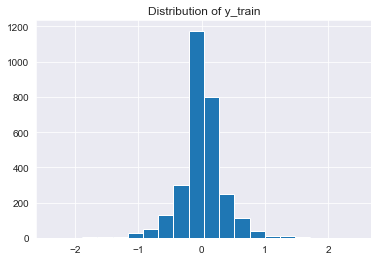

In [43]:
y_train.hist(bins=20)
plt.title('Distribution of y_train')
plt.show()

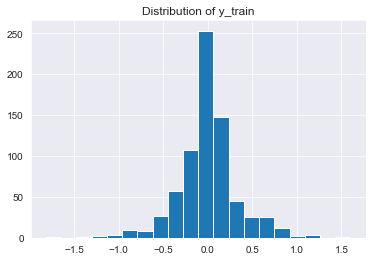

In [44]:
y_test.hist(bins=20)
plt.title('Distribution of y_train')
plt.show()

In [45]:
numerical_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler()),
])

categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),
])

preprocessor = ColumnTransformer(transformers=[
    ('numerical_pipeline', numerical_pipeline, numeric_columns),
    ('categorical_pipeline', categorical_pipeline, categorical_columns)
])

In [46]:
preprocessor

ColumnTransformer(transformers=[('numerical_pipeline',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('scaler', RobustScaler())]),
                                 Index(['Month', 'Year', 'btc_open', 'btc_high', 'btc_low', 'btc_close',
       'oil_open', 'oil_high', 'oil_low', 'oil_close', 'gold_open',
       'gold_high', 'gold_low', 'gold_close', 'dxy_open', 'dxy_high',
       'dxy_low', 'dxy_close', 'IS_HOLIDAY', 'IS_W...
       'oil_rolling_volatility_30', 'gold_daily_pct_change',
       'gold_rolling_volatility_7', 'gold_rolling_volatility_30',
       'dxy_rolling_volatility_7', 'dxy_rolling_volatility_30',
       'dxy_future_pct_change'],
      dtype='object')),
                                ('categorical_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 Index(['DoW', 'Holiday_Name'], dtype='object'))])

### **`Modelling & Evaluation`**

In [47]:
df['Movement'] = df['dxy_daily_pct_change'].apply(lambda x: 'Positive' if x > 0.07 else ('Negative' if x < -0.07 else 'Stable'))

In [48]:
df['Movement'].value_counts()

Movement
Positive    1274
Negative    1236
Stable      1143
Name: count, dtype: int64

In [49]:
df.shape

(3653, 68)

In [50]:
df.isnull().sum()

DoW                              0
Month                            0
Year                             0
btc_open                         0
btc_high                         0
btc_low                          0
btc_close                        0
oil_open                         2
oil_high                         2
oil_low                          2
oil_close                        2
gold_open                        2
gold_high                        2
gold_low                         2
gold_close                       2
dxy_open                         2
dxy_high                         2
dxy_low                          2
dxy_close                        2
IS_HOLIDAY                       0
IS_WEEKDAY                       0
Holiday_Name                  3549
btc_open_weekly_avg              0
btc_open_monthly_avg             0
btc_close_weekly_avg             0
btc_close_monthly_avg            0
oil_open_weekly_avg              2
oil_open_monthly_avg             2
oil_close_weekly_avg

In [51]:
df = df.drop(columns=['Holiday_Name'])  # Drop the 'Holiday_Name' column
df = df.dropna()  # Drop rows with null values

In [52]:
df = pd.get_dummies(df, columns=['DoW'], drop_first=False)  # One-hot encode 'DoW' column

In [53]:
df.dtypes

Month                           int64
Year                            int64
btc_open                      float64
btc_high                      float64
btc_low                       float64
btc_close                     float64
oil_open                      float64
oil_high                      float64
oil_low                       float64
oil_close                     float64
gold_open                     float64
gold_high                     float64
gold_low                      float64
gold_close                    float64
dxy_open                      float64
dxy_high                      float64
dxy_low                       float64
dxy_close                     float64
IS_HOLIDAY                    float64
IS_WEEKDAY                      int64
btc_open_weekly_avg           float64
btc_open_monthly_avg          float64
btc_close_weekly_avg          float64
btc_close_monthly_avg         float64
oil_open_weekly_avg           float64
oil_open_monthly_avg          float64
oil_close_we

In [54]:
df = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

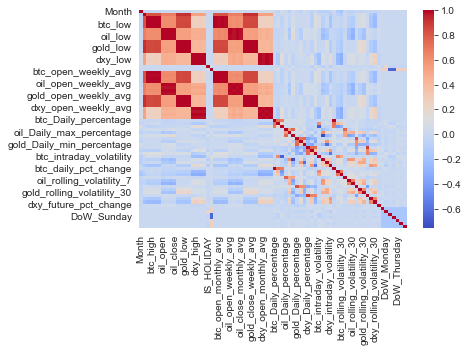

In [55]:
corr_matrix = df.drop(columns=['Movement']).corr()

# Plot heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', fmt='.2f')
plt.show()

In [56]:
# Compute VIF for each feature
data = add_constant(df.drop(columns=['Movement']))

vif_data = pd.DataFrame()
vif_data['feature'] = data.columns
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

vif_data.sort_values(by='VIF', ascending=False)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
72,DoW_Wednesday,inf
38,btc_Daily_max_percentage,inf
41,oil_Daily_max_percentage,inf
42,oil_Daily_min_percentage,inf
44,gold_Daily_max_percentage,inf
45,gold_Daily_min_percentage,inf
47,dxy_Daily_max_percentage,inf
48,dxy_Daily_min_percentage,inf
20,IS_WEEKDAY,inf
49,btc_intraday_volatility,inf


In [94]:
df_final = df[['gold_daily_pct_change','oil_daily_pct_change','btc_daily_pct_change',
 #              'oil_close','gold_close','btc_close',
 #              'oil_open','gold_open','btc_open',
 #              'oil_high','gold_high','btc_high',
 #              'oil_low','gold_low','btc_low',              
 #              'oil_close_weekly_avg','gold_close_weekly_avg','btc_close_weekly_avg',     
 #              'oil_close_monthly_avg','gold_close_monthly_avg','btc_close_monthly_avg',
               'Movement','IS_WEEKDAY','IS_HOLIDAY','Month','Year',
               'DoW_Tuesday','DoW_Thursday','DoW_Sunday','DoW_Friday','DoW_Monday',
               'btc_intraday_volatility','oil_intraday_volatility','gold_intraday_volatility',
#                'btc_Daily_percentage','oil_Daily_percentage','gold_Daily_percentage',
               'btc_rolling_volatility_7','oil_rolling_volatility_7','gold_rolling_volatility_7', 
               'btc_rolling_volatility_30','oil_rolling_volatility_30', 'gold_rolling_volatility_30'
 #             'btc_Daily_max_percentage','oil_Daily_max_percentage','gold_Daily_max_percentage'
 #             'btc_Daily_min_percentage','oil_Daily_min_percentage','gold_Daily_min_percentage' 
              ]]

In [95]:
# Compute VIF for each feature
data = add_constant(df_final.drop(columns=['Movement']))

vif_data = pd.DataFrame()
vif_data['feature'] = data.columns
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
0,const,521410.614616
4,IS_WEEKDAY,2.912586
16,btc_rolling_volatility_7,2.551943
21,gold_rolling_volatility_30,2.320210
20,oil_rolling_volatility_30,2.168075
17,oil_rolling_volatility_7,2.102786
19,btc_rolling_volatility_30,2.053652
14,oil_intraday_volatility,1.931248
18,gold_rolling_volatility_7,1.830271
13,btc_intraday_volatility,1.787385


[]

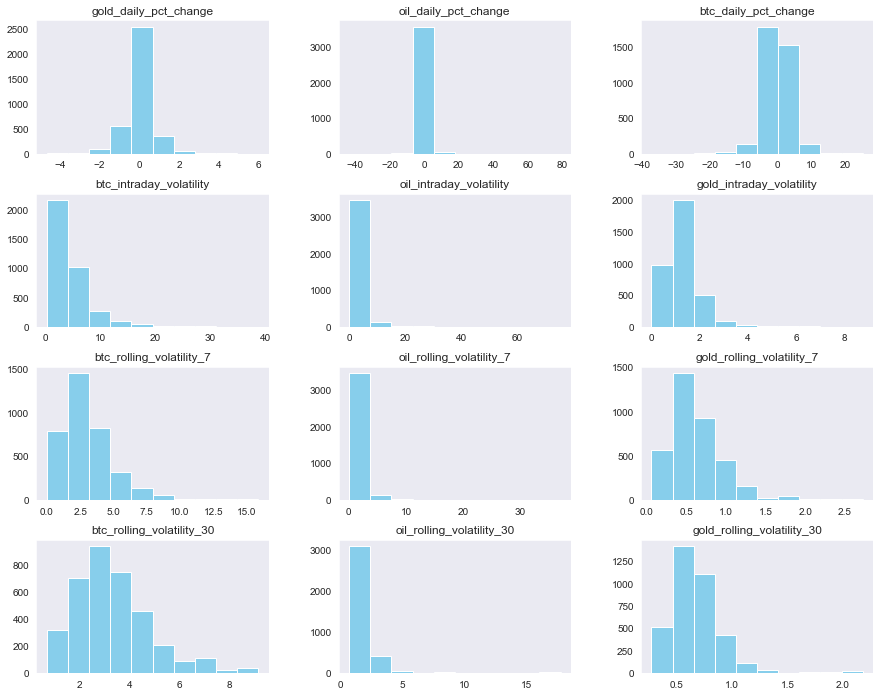

In [96]:
df_final.drop(columns=['Movement','DoW_Tuesday','DoW_Thursday','DoW_Sunday','DoW_Friday','DoW_Monday','Month', 'Year', 'IS_HOLIDAY', 'IS_WEEKDAY']).hist(grid=False, color='skyblue', figsize=(15, 12) )
plt.plot()

In [97]:
# Divide data into X and Y variables
X = df_final.drop(columns=['Movement'])
y = df_final['Movement']

In [98]:
mutual_info_values  = mutual_info_classif(X , y, discrete_features= True )
Columns_to_ = X
mi_df = pd.DataFrame({'Feature': Columns_to_.columns, 'Mutual_Information': mutual_info_values})

mi_df = mi_df.sort_values(by='Mutual_Information', ascending=False)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clusteri

In [99]:
mi_df

,Feature,Mutual_Information
20,gold_rolling_volatility_30,1.097534
19,oil_rolling_volatility_30,1.097534
18,btc_rolling_volatility_30,1.097534
17,gold_rolling_volatility_7,1.097534
16,oil_rolling_volatility_7,1.097534
13,oil_intraday_volatility,1.097151
15,btc_rolling_volatility_7,1.097007
2,btc_daily_pct_change,1.094776
12,btc_intraday_volatility,1.094690
1,oil_daily_pct_change,1.093849


In [100]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=123)

In [101]:
y_train.value_counts()

Movement
Positive    1024
Negative     967
Stable       905
Name: count, dtype: int64

In [102]:
y_test.value_counts()

Movement
Negative    258
Positive    240
Stable      226
Name: count, dtype: int64

In [103]:
input_features = X.columns
input_features

Index(['gold_daily_pct_change', 'oil_daily_pct_change', 'btc_daily_pct_change',
       'IS_WEEKDAY', 'IS_HOLIDAY', 'Month', 'Year', 'DoW_Tuesday',
       'DoW_Thursday', 'DoW_Sunday', 'DoW_Friday', 'DoW_Monday',
       'btc_intraday_volatility', 'oil_intraday_volatility',
       'gold_intraday_volatility', 'btc_rolling_volatility_7',
       'oil_rolling_volatility_7', 'gold_rolling_volatility_7',
       'btc_rolling_volatility_30', 'oil_rolling_volatility_30',
       'gold_rolling_volatility_30'],
      dtype='object')

In [104]:
input_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
])


preprocessor = ColumnTransformer(transformers=[
    ('numerical_pipeline', input_pipeline, input_features),
    ])

In [105]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [168]:
models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('SVC', SVC(random_state=42, probability=True)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('Bagging Classifier', BaggingClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0)),
    ('LightGBM', LGBMClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('Extra Trees', ExtraTreesClassifier(random_state=42)),
    ('Neural Network', MLPClassifier(random_state=42, max_iter=500))
]

In [169]:
# Create an ensemble model using majority voting (or weighted voting if you prefer)
voting_estimators = [
#     ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
#     ('SVC', SVC(probability=True, random_state=42))
    
#     ('XGBoost', XGBClassifier(random_state=42)),
#     ('CatBoost', CatBoostClassifier(random_state=42, verbose=0)),
#     ('LightGBM', LGBMClassifier(random_state=42)),
#     ('Random Forest', RandomForestClassifier(random_state=42))
]

ensemble_model = VotingClassifier(estimators=voting_estimators, voting='soft')

# Add ensemble model to the models list
models.append(('Voting Classifier', ensemble_model))

In [170]:
base_learners = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('SVC', SVC(probability=True, random_state=42))]

meta_learner = LogisticRegression(random_state=42)

stacking_classifier = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

models.append(('Stacking Classifier', stacking_classifier))

In [171]:
selection = SelectKBest(mutual_info_classif, k='all')

fi_smote_df = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

all_pipelines = {}

for model_name, classifier in models:

    pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_importance', selection),
    ('classifier', classifier)
    ])

    pipeline.fit(X_train, y_train_encoded)

    all_pipelines[model_name] = pipeline

    smote_y_pred = pipeline.predict(X_test)

    fi_smote_dict = classification_report(y_test_encoded, smote_y_pred, output_dict=True)

    acccuracy = fi_smote_dict['accuracy']
    precision = fi_smote_dict['weighted avg']['precision']
    recall = fi_smote_dict['weighted avg']['recall']
    f1_score = fi_smote_dict['weighted avg']['f1-score']

    fi_smote_df.loc[len(fi_smote_df)] = [model_name, acccuracy, precision, recall, f1_score]


fi_smote_df.sort_values(by='Accuracy', ascending=False)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3097
[LightGBM] [Info] Number of data points in the train set: 2896, number of used features: 21
[LightGBM] [Info] Start training from score -1.096887
[LightGBM] [Info] Start training from score -1.039614
[LightGBM] [Info] Start training from score -1.163151


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:15:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model_name,Accuracy,Precision,Recall,F1_Score
4,XGBoost,0.657459,0.663024,0.657459,0.658434
8,CatBoost,0.642265,0.643497,0.642265,0.642535
14,Voting Classifier,0.633978,0.636180,0.633978,0.633822
9,LightGBM,0.625691,0.629607,0.625691,0.626231
15,Stacking Classifier,0.607735,0.610870,0.607735,0.608062
12,Extra Trees,0.599448,0.600447,0.599448,0.598857
2,Random Forest,0.596685,0.599308,0.596685,0.596757
5,Bagging Classifier,0.591160,0.595215,0.591160,0.591046
7,Gradient Boosting,0.577348,0.577664,0.577348,0.576802
1,SVC,0.563536,0.570451,0.563536,0.561669


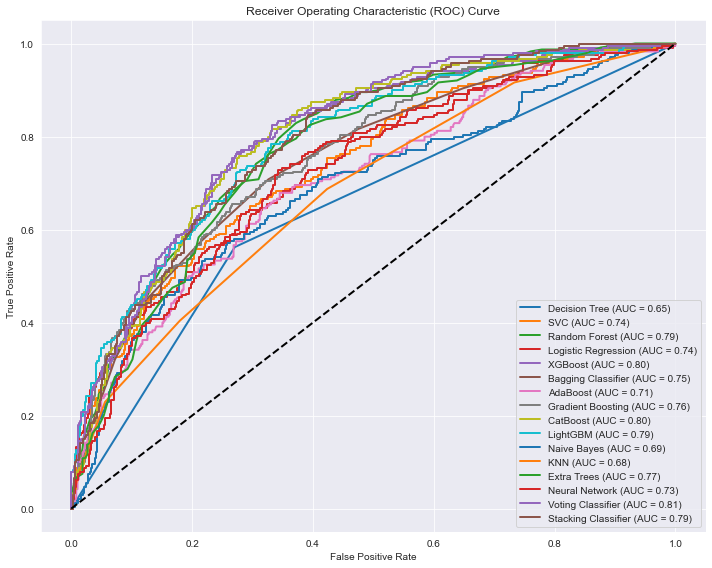

In [172]:
# Initialize the figure
plt.figure(figsize=(10, 8))

# Loop through each model and plot its ROC curve
for model_name, pipeline in all_pipelines.items():
    # Predict probabilities for the positive class (Class 1)
    y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilities for class 1
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test_encoded, y_prob, pos_label=1)  # Positive class = 1
    roc_auc = auc(fpr, tpr)  # Calculate AUC
    
    # Plot the ROC curve for each model
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (Random classifier line)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()


In [173]:
catboost_pipeline = all_pipelines['CatBoost']
catboost_smote_y_pred = catboost_pipeline.predict(X_test)
catboost_model = catboost_pipeline.named_steps['classifier']

In [185]:
XGBoost_pipeline = all_pipelines['XGBoost']
XGBoost_smote_y_pred = XGBoost_pipeline.predict(X_test)
XGBoost_model = XGBoost_pipeline.named_steps['classifier']

In [174]:
voting_pipeline = all_pipelines['Voting Classifier']
voting_smote_y_pred = voting_pipeline.predict(X_test)
voting_model = voting_pipeline.named_steps['classifier']

In [175]:
forest_pipeline = all_pipelines['Random Forest']
forest_smote_y_pred = forest_pipeline.predict(X_test)
forest_model = forest_pipeline.named_steps['classifier']

In [176]:
print(label_encoder.classes_)  # Shows the class names in order of their indices

print(catboost_model.classes_)  # For models that expose class labels

['Negative' 'Positive' 'Stable']
[0 1 2]


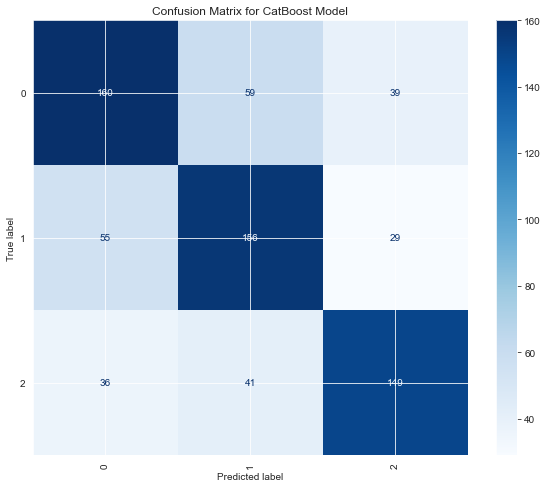

In [177]:
cm = confusion_matrix(y_test_encoded, catboost_smote_y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=catboost_pipeline.named_steps['classifier'].classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.gcf().set_size_inches(10, 8)  # Increase figure size
plt.title("Confusion Matrix for CatBoost Model")
plt.show()

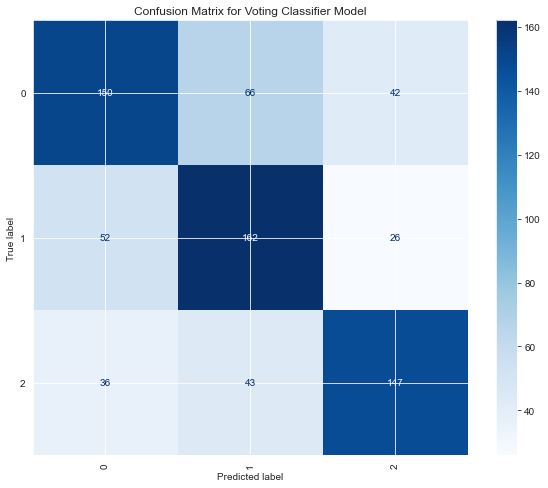

In [178]:
cm = confusion_matrix(y_test_encoded, voting_smote_y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_pipeline.named_steps['classifier'].classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.gcf().set_size_inches(10, 8)  # Increase figure size
plt.title("Confusion Matrix for Voting Classifier Model")
plt.show()

In [190]:
# Get feature importance
feature_importances = catboost_model.get_feature_importance()

# Retrieve feature names from the preprocessor
feature_names = catboost_pipeline.named_steps['preprocessor'].transformers_[0][2]

fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(fi_df)

                       Feature  Importance
0        gold_daily_pct_change   12.959294
1         oil_daily_pct_change    9.573495
17   gold_rolling_volatility_7    7.491515
14    gold_intraday_volatility    6.595104
20  gold_rolling_volatility_30    6.587207
13     oil_intraday_volatility    6.263765
19   oil_rolling_volatility_30    6.105655
16    oil_rolling_volatility_7    5.961383
15    btc_rolling_volatility_7    5.854964
2         btc_daily_pct_change    5.574013
18   btc_rolling_volatility_30    5.496466
12     btc_intraday_volatility    4.703852
5                        Month    4.669741
6                         Year    3.925468
3                   IS_WEEKDAY    3.224147
11                  DoW_Monday    1.491101
8                 DoW_Thursday    1.107082
7                  DoW_Tuesday    1.042073
10                  DoW_Friday    0.834733
4                   IS_HOLIDAY    0.436392
9                   DoW_Sunday    0.102552


In [189]:
# Get feature importance
feature_importances = XGBoost_model.feature_importances_

# Retrieve feature names from the preprocessor
feature_names = XGBoost_pipeline.named_steps['preprocessor'].transformers_[0][2]

fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(fi_df)

                       Feature  Importance
11                  DoW_Monday    0.203958
3                   IS_WEEKDAY    0.137072
4                   IS_HOLIDAY    0.088840
0        gold_daily_pct_change    0.059666
13     oil_intraday_volatility    0.039806
1         oil_daily_pct_change    0.036229
7                  DoW_Tuesday    0.035385
6                         Year    0.034439
18   btc_rolling_volatility_30    0.032553
17   gold_rolling_volatility_7    0.031349
20  gold_rolling_volatility_30    0.030960
5                        Month    0.030894
19   oil_rolling_volatility_30    0.030417
15    btc_rolling_volatility_7    0.030363
14    gold_intraday_volatility    0.029450
8                 DoW_Thursday    0.029259
16    oil_rolling_volatility_7    0.028859
12     btc_intraday_volatility    0.025587
10                  DoW_Friday    0.025262
2         btc_daily_pct_change    0.024912
9                   DoW_Sunday    0.014739


In [180]:
# Get feature importance (corrected method name)
feature_importances = forest_model.feature_importances_

# Retrieve feature names from the preprocessor
feature_names = voting_pipeline.named_steps['preprocessor'].transformers_[0][2]

# Create a DataFrame for feature importance
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(fi_df)

                       Feature  Importance
0        gold_daily_pct_change    0.134320
1         oil_daily_pct_change    0.078003
13     oil_intraday_volatility    0.073221
17   gold_rolling_volatility_7    0.066298
14    gold_intraday_volatility    0.063958
19   oil_rolling_volatility_30    0.063538
2         btc_daily_pct_change    0.061578
16    oil_rolling_volatility_7    0.061327
15    btc_rolling_volatility_7    0.060961
18   btc_rolling_volatility_30    0.060309
20  gold_rolling_volatility_30    0.058944
12     btc_intraday_volatility    0.057886
5                        Month    0.040936
6                         Year    0.037650
3                   IS_WEEKDAY    0.026825
11                  DoW_Monday    0.016171
4                   IS_HOLIDAY    0.009406
8                 DoW_Thursday    0.007860
7                  DoW_Tuesday    0.007642
10                  DoW_Friday    0.007563
9                   DoW_Sunday    0.005603


In [181]:
feature_importances = {}

# Assuming X_train is a DataFrame with column names (features)
feature_names = X_train.columns

# Collect feature importances for models that support feature_importances_
for clf_name, clf in ensemble_model.named_estimators_.items():
    if hasattr(clf, 'feature_importances_'):  # RandomForest, XGB support this
        importances = clf.feature_importances_
        fi_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)
        feature_importances[clf_name] = fi_df

# For LogisticRegression and SVC, use coefficients (only for linear classifiers)
for clf_name, clf in ensemble_model.named_estimators_.items():
    if hasattr(clf, 'coef_'):  # LogisticRegression and linear SVC support this
        importances = clf.coef_[0]  # Take the first row of coefficients
        fi_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)
        feature_importances[clf_name] = fi_df

# Now, display the DataFrames for each model
for clf_name, fi_df in feature_importances.items():
    print(f"Feature importances for {clf_name}:")
    print(fi_df)
    print()


Feature importances for XGBoost:
                       Feature  Importance
11                  DoW_Monday    0.203958
3                   IS_WEEKDAY    0.137072
4                   IS_HOLIDAY    0.088840
0        gold_daily_pct_change    0.059666
13     oil_intraday_volatility    0.039806
1         oil_daily_pct_change    0.036229
7                  DoW_Tuesday    0.035385
6                         Year    0.034439
18   btc_rolling_volatility_30    0.032553
17   gold_rolling_volatility_7    0.031349
20  gold_rolling_volatility_30    0.030960
5                        Month    0.030894
19   oil_rolling_volatility_30    0.030417
15    btc_rolling_volatility_7    0.030363
14    gold_intraday_volatility    0.029450
8                 DoW_Thursday    0.029259
16    oil_rolling_volatility_7    0.028859
12     btc_intraday_volatility    0.025587
10                  DoW_Friday    0.025262
2         btc_daily_pct_change    0.024912
9                   DoW_Sunday    0.014739

Feature importances 

In [182]:
feature_importances = {}
feature_names = X_train.columns  # Assuming X_train is a DataFrame with column names

for clf_name, clf in ensemble_model.named_estimators_.items():
    if hasattr(clf, 'feature_importances_'):  # RandomForest, XGB support this
        feature_importances[clf_name] = clf.feature_importances_

# For LogisticRegression and SVC, use coefficients (only for linear classifiers)
for clf_name, clf in ensemble_model.named_estimators_.items():
    if hasattr(clf, 'coef_'):  # LogisticRegression and linear SVC support this
        feature_importances[clf_name] = clf.coef_[0]  # Take the first row of coefficients

# Now, calculate the average of the feature importances
# First, collect all feature importances into a list for averaging
importances_list = []
for clf_name, importances in feature_importances.items():
    importances_list.append(importances)

# Ensure all importances have the same length (if not, handle it accordingly)
# If models have different numbers of features, they won't align
# Here we'll assume all models output the same number of features

# Convert the list to a numpy array for easy manipulation
importances_array = np.array(importances_list)

# Calculate the average of the feature importances (axis=0 averages across all models)
average_importances = np.mean(importances_array, axis=0)

# Create a DataFrame with feature names and their average importance
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Average Importance': average_importances
}).sort_values(by='Average Importance', ascending=False)

# Display the averaged feature importances
print(fi_df)

                       Feature  Average Importance
3                   IS_WEEKDAY            0.358627
0        gold_daily_pct_change            0.196217
13     oil_intraday_volatility            0.079240
17   gold_rolling_volatility_7            0.067539
5                        Month            0.062989
18   btc_rolling_volatility_30            0.057320
2         btc_daily_pct_change            0.030754
14    gold_intraday_volatility            0.023386
1         oil_daily_pct_change            0.014799
16    oil_rolling_volatility_7            0.011828
19   oil_rolling_volatility_30            0.010093
12     btc_intraday_volatility            0.000132
15    btc_rolling_volatility_7           -0.009763
6                         Year           -0.013708
8                 DoW_Thursday           -0.014202
20  gold_rolling_volatility_30           -0.015504
9                   DoW_Sunday           -0.020267
10                  DoW_Friday           -0.066943
7                  DoW_Tuesday 

In [183]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title("Feature Importance for CatBoost Model", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `Importance` for `x`. An entry with this name does not appear in `data`.

<Figure size 864x576 with 0 Axes>

In [ ]:
# Define the features for which you want to plot PDPs
features_to_plot = ['gold_daily_pct_change', 'oil_daily_pct_change', 'btc_daily_pct_change']

# Define class labels
class_labels = ['Negative', 'Positive', 'Stable']

# Loop through all class indices and generate PDPs
for class_idx, label in enumerate(class_labels):
    print(f"Partial Dependence Plot for Class {class_idx} - {label}")

    # Create a figure with custom size
    fig, ax = plt.subplots(figsize=(12, 8))

    # Generate Partial Dependence Plot
    PartialDependenceDisplay.from_estimator(
        catboost_model,  # Your trained CatBoost model
        X_train,         # The training data used for fitting the model
        features=features_to_plot,  # Features for which you want the PDP
        target=class_idx,  # Specify which class (0: Negative, 1: Positive, 2: Stable)
        ax=ax  # Pass the custom axis for better control over the plot
    )

    # Customize the title for each class
    ax.set_title(f"Partial Dependence Plot for Class {class_idx} - {label}", fontsize=16)
    plt.tight_layout()  # Adjust the layout to avoid overlap
    plt.show()  # Display the plot

In [ ]:
# Create SHAP explainer
explainer = shap.TreeExplainer(catboost_model)

# Calculate SHAP values for the scaled data (X_train is the scaled data)
shap_values = explainer.shap_values(X_train)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Now adjust the size of the plot after it is generated
plt.gcf().set_size_inches(14, 10)  # Adjust this to your desired size

# Show the plot with the adjusted size
plt.show()